In [1]:
from collections import defaultdict
import os

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

from stats import load_config, read_data, get_per_person, get_release_hist, get_time_added_hist

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
collab = "2021"

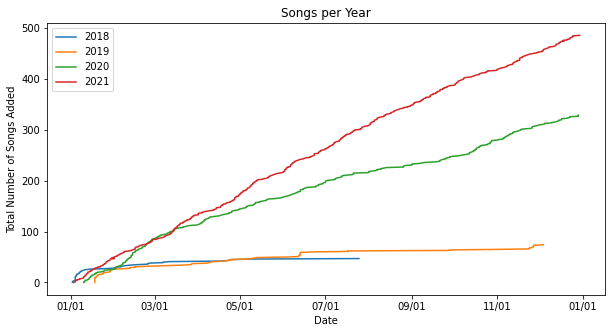

In [3]:
fig, ax = plt.subplots(figsize=(10,5))
fig.patch.set_facecolor('white')
ax.set_title("Songs per Year")
ax.set_xlabel("Date")
ax.set_ylabel("Total Number of Songs Added")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

for file in sorted(os.listdir("data")):
    if file in [".DS_Store", "original.csv"]:
        continue
    data = read_data(os.path.join("data", file))
    
    # accounts for final song being added after year ended
    if file in ["2020.csv", "2021.csv"]:
        data = data[:-1]
    
    x = [add.time_added.date().replace(year=2020) for add in data]
    y = range(len(data))
    ax.plot(x, y, label=file[:4])

ax.legend(loc='upper left')
plt.show()

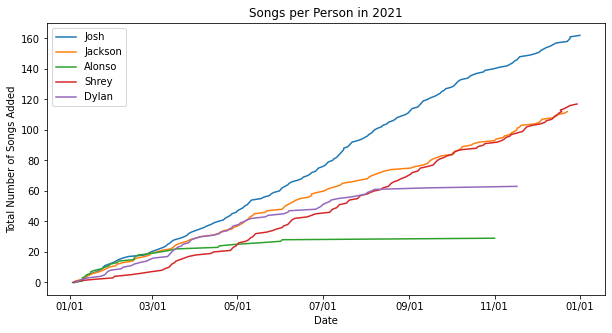

In [4]:
fig, ax = plt.subplots(figsize=(10,5))
fig.patch.set_facecolor('white')
ax.set_title(f"Songs per Person in {collab}")
ax.set_xlabel("Date")
ax.set_ylabel("Total Number of Songs Added")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

config = load_config("config.json")
data = read_data(f"data/{collab}.csv", config)
per_person = get_per_person(data)
    
for person, adds in per_person.items():
    x = [add.time_added.date() for add in adds]
    y = range(len(adds))
    ax.plot(x, y, label=person)

ax.legend(loc='upper left')
plt.show()

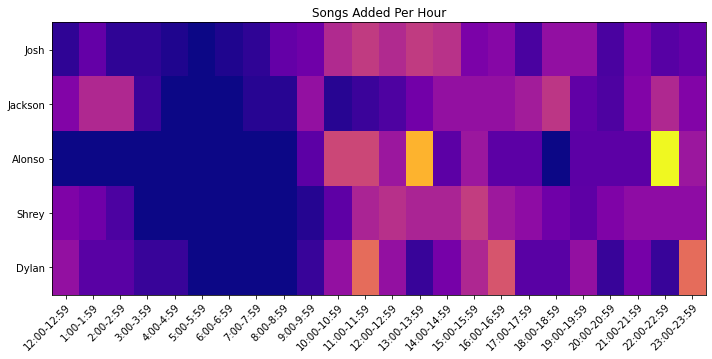

In [5]:
config = load_config("config.json")
data = read_data(f"data/{collab}.csv", config)
add_times = get_time_added_hist(data)
hours = [f"{12 if i == 0 else i}:00-{12 if i == 0 else i}:59" for i in range(24)]
people = list(per_person)

fig, ax = plt.subplots(figsize=(10,5))
im = ax.imshow(add_times, cmap="plasma", aspect=2)

ax.set_xticks(np.arange(len(hours)), labels=hours)
ax.set_yticks(np.arange(len(people)), labels=people)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.set_title("Songs Added Per Hour")
fig.tight_layout()
fig.patch.set_facecolor('white')
plt.show()

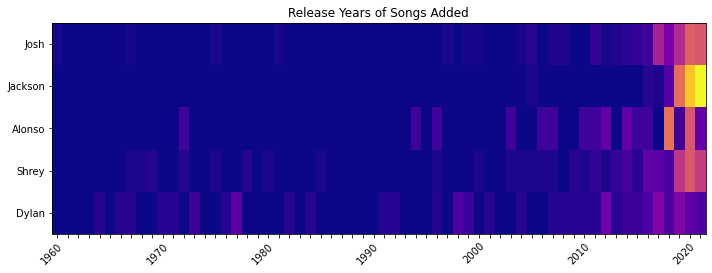

In [6]:
config = load_config("config.json")
data = read_data(f"data/{collab}.csv", config)
add_years, years = get_release_hist(data)
people = list(per_person)
    
fig, ax = plt.subplots(figsize=(10,5))
im = ax.imshow(add_years, cmap="plasma", aspect=4)

ax.set_xticks(np.arange(len(years)), labels=[year if year % 10 == 0 else "" for year in years])
ax.set_yticks(np.arange(len(people)), labels=people)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.set_title("Release Years of Songs Added")
fig.patch.set_facecolor('white')
fig.tight_layout()
plt.show()